In [91]:
import torch
from matplotlib import pyplot as plt

experiment_name = '128_all_run2'
test_generator_path = f'D:/GitRepos/DL8TQ2_KepalkotoDiagnosztikaBeadando/runs/{experiment_name}/generator_last.pt'
noise_vector_size = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

fixed_noise = torch.randn(64, noise_vector_size, 1, 1, device=device)

generator = torch.jit.load(test_generator_path)

In [62]:
fixed_noise.shape

torch.Size([64, 100, 4, 4])

In [46]:
from torchviz import make_dot
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

generator_output = generator(fixed_noise)
discriminator_output = discriminator(generator_output.detach())

make_dot(generator_output, params=dict(list(generator.named_parameters()))).render("generator_plot", format="png")
make_dot(discriminator_output, params=dict(list(discriminator.named_parameters()))).render("discriminator_plot", format="png")

'discriminator_plot.png'

i

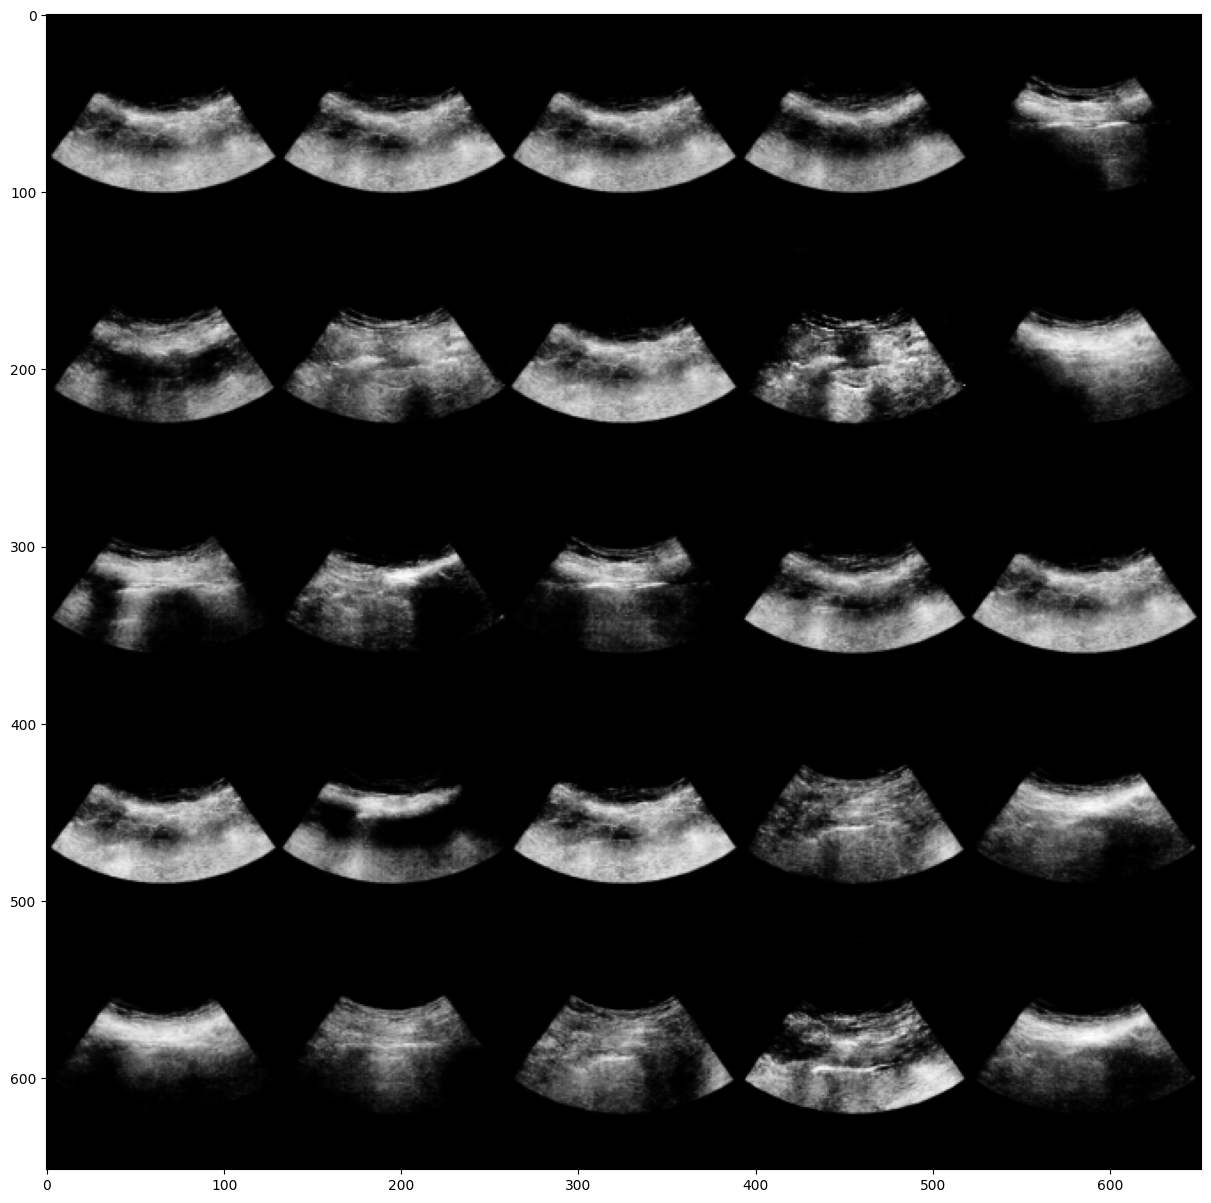

In [107]:
import torchvision
import numpy as np

with torch.inference_mode():
    test_images = generator(fixed_noise).detach().to(torch.device('cpu'))

test = torchvision.utils.make_grid(test_images[:25], padding=2, normalize=True, nrow=5)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(test,(1,2,0)), cmap='gray')
#plt.imshow(test_images[0][0], cmap='gray')
#test_images[15].shape